In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

In [15]:
def myDTFS(x):
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(len(x))
    N = len(x)
    for k in np.arange(0,len(x)):
        tmpVal = 0.0
        Omega[k] = (2*np.pi/N)*k
        for n in np.arange(0,len(x)):
            tmpVal = tmpVal + x[n]*np.exp(-1j*(2*np.pi/N)*k*n)
        X[k] = tmpVal/N
    return (X,Omega)



def myIDTFS(X):
    x = np.zeros(len(X), dtype=float)
    N = len(x)
    for n in np.arange(0,len(x)):
        tmpVal = 0.0
        for k in np.arange(0,len(X)):
            tmpVal = tmpVal + X[k]*np.exp(+1j*(2*np.pi/N)*k*n)
        x[n] = np.absolute(tmpVal)
    return (x)

def myDFT(x):
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(len(x))
    N = len(x)
    for k in np.arange(0,len(x)):
        tmpVal = 0.0
        Omega[k] = (2*np.pi/N)*k
        for n in np.arange(0,len(x)):
            tmpVal = tmpVal + x[n]*np.exp(-1j*(2*np.pi/N)*k*n)
        X[k] = tmpVal
    return (X,Omega)



def myIDFT(X):
    x = np.zeros(len(X), dtype=float)
    N = len(x)
    for n in np.arange(0,len(x)):
        tmpVal = 0.0
        for k in np.arange(0,len(X)):
            tmpVal = tmpVal + X[k]*np.exp(+1j*(2*np.pi/N)*k*n)
        x[n] = np.absolute(tmpVal)/N
    return (x)

def plotMagPhase(x,rad):
    f, axarr = plt.subplots(2, sharex=True)
    x = np.absolute(x)
    axarr[0].stem(np.arange(0,len(x)), x)
    axarr[0].set_ylabel('mag value')
    axarr[1].stem(np.arange(0,len(rad)), rad)
    axarr[1].set_ylabel('Phase (rad)')
    plt.show()

def plotK(W):
    f, axarr = plt.subplots()
    phaseW = np.angle(W)
    print(phaseW)
    axarr.stem(np.arange(0,len(phaseW)),phaseW)
    plt.show()
    print("\n\n\n")
    
def plotDTFSDTFTMag(X):
    N = len(X)
    x = np.absolute(X)
    f, axarr = plt.subplots(figsize=(18, 2.5))
    axarr.stem(np.arange(0,N), x)
    axarr.set_ylabel('DTFS mag value')
    plt.show()
    x = [element * N for element in x]
    f, axarr = plt.subplots(figsize=(18, 2.5))
    axarr.stem(np.arange(0,N), x)
    axarr.set_ylabel('DTFT mag value')
    ticks = range(N)
    ticks = [round(element * 2/N,2) for element in ticks]
#     ticks = [round(element * 2 *np.pi/N,2) for element in ticks]
    plt.xticks(np.arange(0,N), ticks)
    plt.xlabel('w*pi (rad/sample) ')
    plt.show()

    print("\n\n\n")
    

## Part 2

In [17]:
def q2b():
    x=[1,1,0,0,0,0,0,0,0,0,0,0]
    (X1, W1) = myDTFS(x)
    (X2, W2) = myDFT(x)
    Xf1=np.fft.fft(x)
    Xang1 = np.angle(Xf1)
    print("DTFS")
    plotMagPhase(X1, Xang1)
    print("DFT")
    plotMagPhase(X2, Xang1)
    arr=[]
    for i in range(len(W1)):
        print("K =", str(i), "w =", W1[i])
    return(X1, X2)
        
#     print(2*np.pi/len(X1)*12)

DTFS


C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


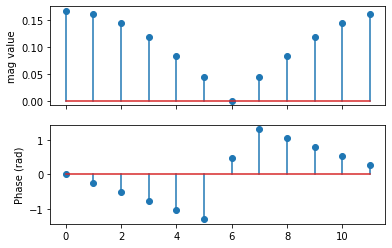

DFT


C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


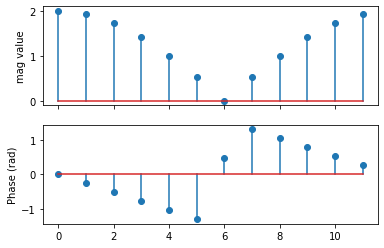

K = 0 w = 0.0
K = 1 w = 0.5235987755982988
K = 2 w = 1.0471975511965976
K = 3 w = 1.5707963267948966
K = 4 w = 2.0943951023931953
K = 5 w = 2.617993877991494
K = 6 w = 3.141592653589793
K = 7 w = 3.665191429188092
K = 8 w = 4.1887902047863905
K = 9 w = 4.71238898038469
K = 10 w = 5.235987755982988
K = 11 w = 5.759586531581287


In [18]:
(X1, X2) = q2b()

In [19]:
def q2c(X1, X2):
    x1 = myIDTFS(X1)
    x2 = myIDFT(X2)
    print(np.round(x1,5))
    print(np.round(x2,5))

In [20]:
q2c(X1, X2)
# X1, x2 is return value from q2b. myIDTFS gives same result as myIDFT, as they should 

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
def q2d():
    x2=[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    x3=[10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    (X2, W2) = myDTFS(x2)
    (X3, W3) = myDTFS(x3)
    Xf2 = np.fft.fft(x2)
    Xf3 = np.fft.fft(x3)
    Xang2 = np.angle(Xf2)
    Xang3 = np.angle(Xf3)
    print("X2")
    plotMagPhase(X2, Xang2)
    # In X2, Amplitude is same, with phase difference
    print("X3")
    plotMagPhase(X3, Xang3)
    # In X3, Phase is same, with amplitude scaled

X2


C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


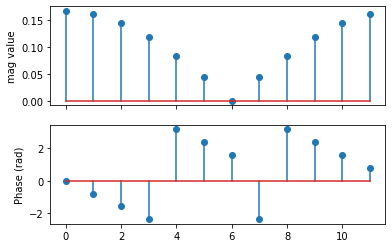

X3


C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


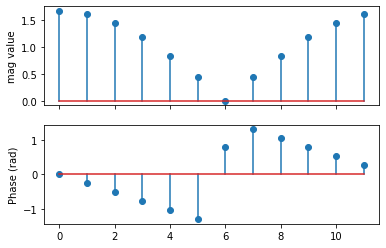

In [22]:
q2d()

## Part 3

In [23]:
def myMatrixDFT(x):
    N = len(x)
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(N)
    rows, cols = (N, N) 
    W = [[0 for i in range(cols)] for j in range(rows)] 
    for k in range(N):
        for n in range(N):
            W[k][n] = round(np.exp(-1j*2*np.pi*k*n/N),3)
    X = np.matmul(W, x)
    
    for i in range(len(W)):
        print("k = ", str(i))
        plotK(W[i])
    
    for k in np.arange(0,len(x)):
        Omega[k] = (2*np.pi/N)*k

    return (X,Omega)

In [24]:
def q3():
    x=[1,1,0,0,0,0,0,0,0,0,0,0]
    X4, W4 =myMatrixDFT(x)
    Xf4=np.fft.fft(x)
    Xang4 = np.angle(Xf4)
#     plotMagPhase(X4, Xang4)
#     Each row is 2*pi*k divided by N; for k = 1 to 5, The phase goes around k times faster compared to k=1. 
#     For k=7 to 11, they are conjugate of k = 5 to 1 (i.e. 1 = conjugate(11), 2 = conjugate(10) etc), 
#     hence the phase is flipped

k =  0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


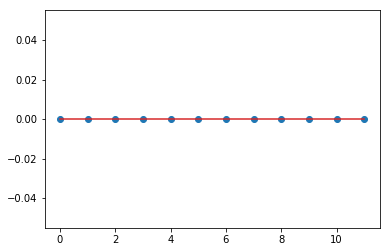





k =  1
[ 0.         -0.52361148 -1.04718485 -1.57079633 -2.0944078  -2.61798118
 -3.14159265  2.61798118  2.0944078   1.57079633  1.04718485  0.52361148]


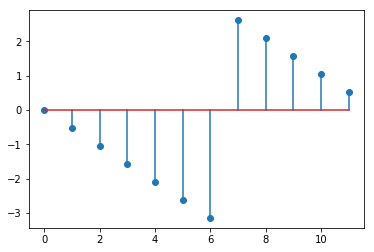





k =  2
[ 0.         -1.04718485 -2.0944078  -3.14159265  2.0944078   1.04718485
  0.         -1.04718485 -2.0944078  -3.14159265  2.0944078   1.04718485]


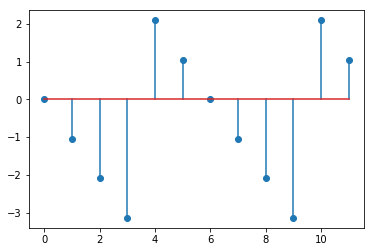





k =  3
[ 0.         -1.57079633 -3.14159265  1.57079633  0.         -1.57079633
 -3.14159265  1.57079633  0.         -1.57079633 -3.14159265  1.57079633]


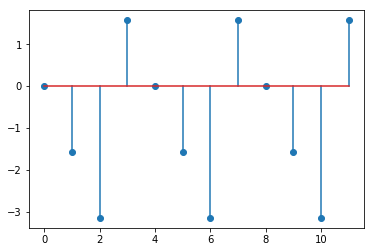





k =  4
[ 0.        -2.0944078  2.0944078  0.        -2.0944078  2.0944078
  0.        -2.0944078  2.0944078  0.        -2.0944078  2.0944078]


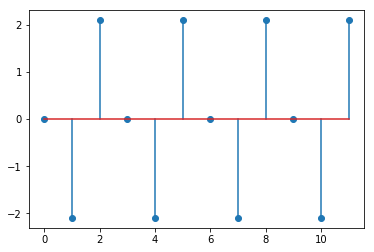





k =  5
[ 0.         -2.61798118  1.04718485 -1.57079633  2.0944078  -0.52361148
 -3.14159265  0.52361148 -2.0944078   1.57079633 -1.04718485  2.61798118]


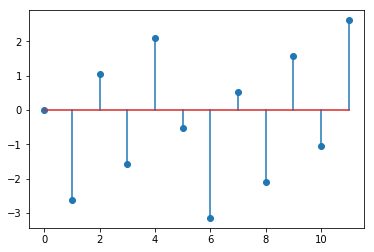





k =  6
[ 0.         -3.14159265  0.         -3.14159265  0.         -3.14159265
  0.         -3.14159265  0.         -3.14159265  0.          3.14159265]


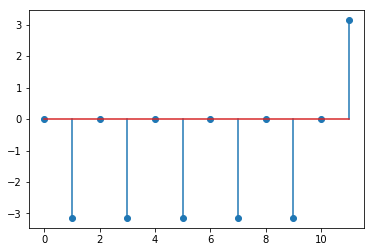





k =  7
[ 0.          2.61798118 -1.04718485  1.57079633 -2.0944078   0.52361148
 -3.14159265 -0.52361148  2.0944078  -1.57079633  1.04718485 -2.61798118]


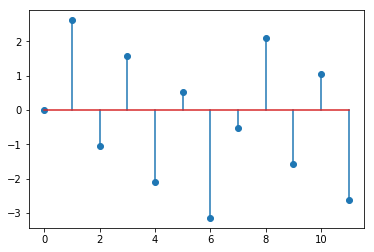





k =  8
[ 0.         2.0944078 -2.0944078  0.         2.0944078 -2.0944078
  0.         2.0944078 -2.0944078  0.         2.0944078 -2.0944078]


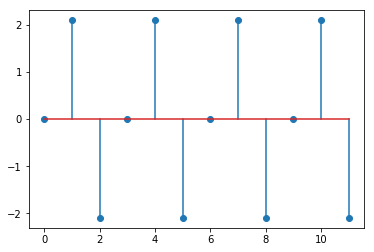





k =  9
[ 0.          1.57079633 -3.14159265 -1.57079633  0.          1.57079633
 -3.14159265 -1.57079633  0.          1.57079633  3.14159265 -1.57079633]


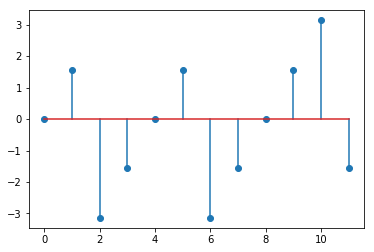





k =  10
[ 0.          1.04718485  2.0944078  -3.14159265 -2.0944078  -1.04718485
  0.          1.04718485  2.0944078   3.14159265 -2.0944078  -1.04718485]


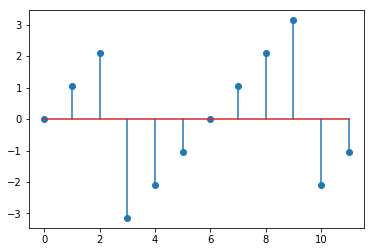





k =  11
[ 0.          0.52361148  1.04718485  1.57079633  2.0944078   2.61798118
 -3.14159265 -2.61798118 -2.0944078  -1.57079633 -1.04718485 -0.52361148]


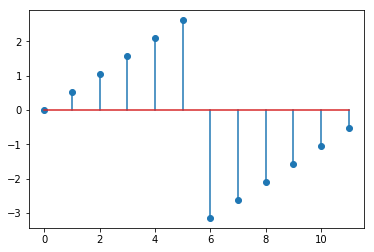

In [499]:
q3()

## Part 4

In [25]:
#q4a: Because the result of DTFT is continuous where N approaches infinity. We can't have an infinite-sized list
def q4b():
    NList = [12, 24, 48, 96]
    for N in NList:
        print("N =", str(N))
        arr = np.zeros(N)
        arr[0:7]=1
        (X5, W5) = myDTFS(arr)
#         Xf5 = np.fft.fft(arr)
        plotDTFSDTFTMag(X5)
#       DTFS = DTFT/N for an aperiodic signal
        

N = 12


C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


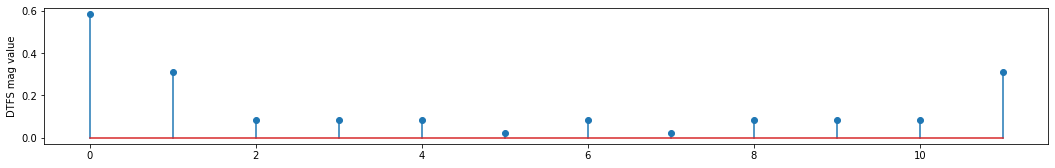

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


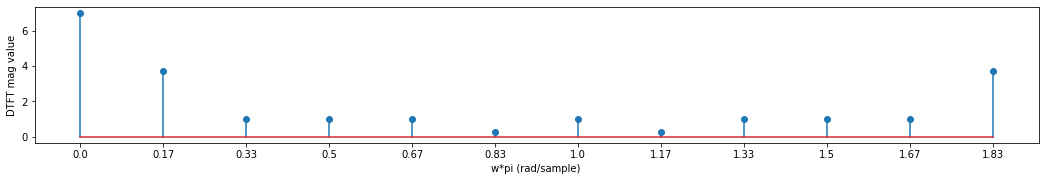

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.






N = 24


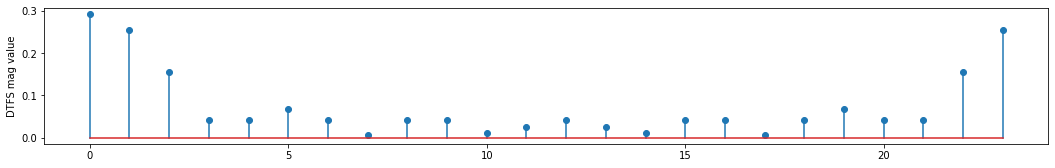

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


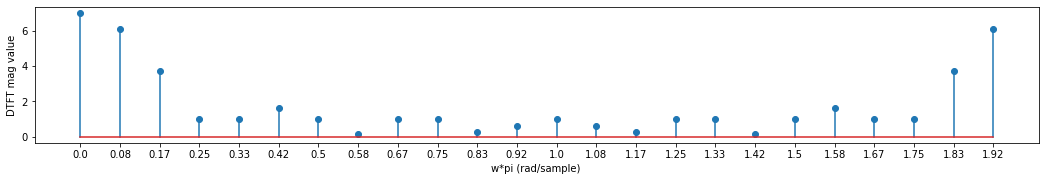

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.






N = 48


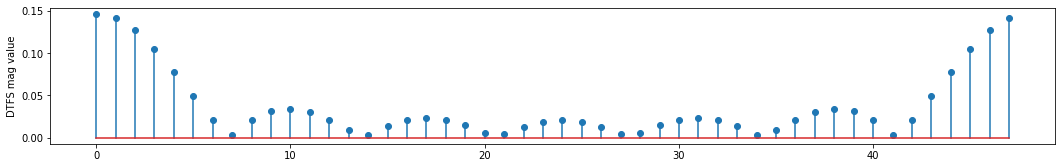

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


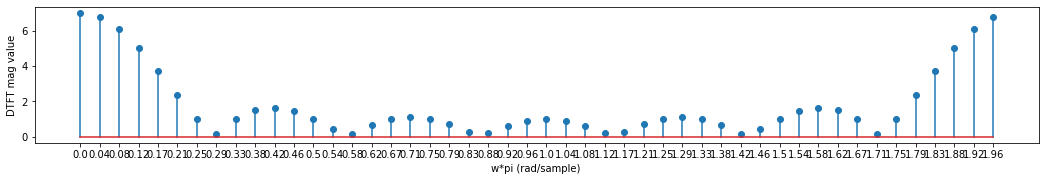





N = 96


C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


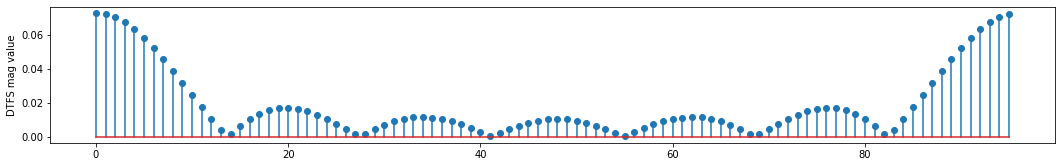

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


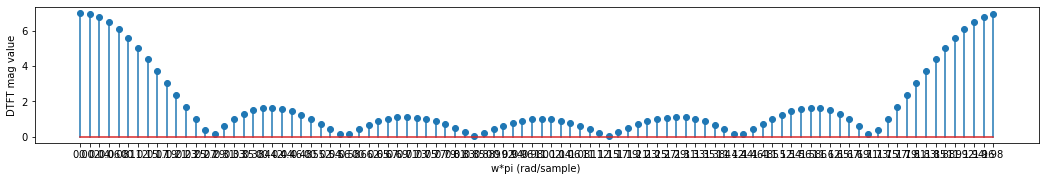

In [26]:
q4b()

## Part 5

In [28]:
def myDFTConvolve(ipX, impulseH):
    L = len(ipX)+len(impulseH)-1
    X1=np.zeros(L)
    X2=np.zeros(L)
    X1[0:len(ipX)]=ipX
    X2[0:len(impulseH)]=impulseH

    X1 = np.fft.fft(X1)
    X2 = np.fft.fft(X2)

    X3 = X1*X2
    
    X3 = np.fft.ifft(X3)
    return np.round(X3,5)


In [29]:
def q5():
    x = [1,1,1,0,0,0,0,0,0]
    h = [1,1,0,0]
    print("myDFTConvolve:")
    y = myDFTConvolve(x,h)
    print(y)
    print("Scipy fftconvolve:")
    print(np.round(signal.fftconvolve(x,h),5))

In [30]:
q5()

myDFTConvolve:
[ 1.+0.j  2.-0.j  2.+0.j  1.+0.j -0.-0.j  0.-0.j  0.+0.j  0.-0.j  0.-0.j
  0.-0.j  0.+0.j  0.+0.j]
Scipy fftconvolve:
[ 1.  2.  2.  1. -0.  0.  0.  0.  0.  0.  0.  0.]
